In [19]:
from data_functions import get_ant_datafiles_info, preprocess_antcolony_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

ant_data = get_ant_datafiles_info()
data_indoor = pd.DataFrame()
data_outdoor = pd.DataFrame()

#Loading all the data, both indoor and outdoor
for i in range(0,4):
    pre_data = preprocess_antcolony_data(ant_data['file'][i])
    data_indoor = pd.concat([data_indoor,pre_data])

for i in range(5,9):
    pre_data = preprocess_antcolony_data(ant_data['file'][i])
    data_outdoor = pd.concat([data_outdoor,pre_data])

test_indoor = preprocess_antcolony_data(ant_data['file'][4])
test_outdoor = preprocess_antcolony_data(ant_data['file'][9])

#Removing any possible NA values
data_indoor = data_indoor.dropna()
data_outdoor = data_outdoor.dropna()

test_indoor = test_indoor.dropna()
test_outdoor = test_outdoor.dropna()

#Adding the location variable
data_indoor['location'] = "indoor"
data_outdoor['location'] = "outdoor"

test_indoor["location"] = "indoor"
test_outdoor["location"] = "outdoor"

full_data = pd.concat([data_indoor,data_outdoor])
test_data = pd.concat([test_indoor, test_outdoor])

# shuffle data
full_data = full_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# sample from full data and test data equally for "indoor" and "outdoor" (balance classes)
max_len_train = min(len(full_data[full_data["location"] == "indoor"]), len(full_data[full_data["location"] == "outdoor"]))
max_len_test = min(len(test_data[test_data["location"] == "indoor"]), len(test_data[test_data["location"] == "outdoor"]))
full_data = pd.concat([full_data[full_data["location"] == "indoor"].sample(n=max_len_train), full_data[full_data["location"] == "outdoor"].sample(n=max_len_train)])
test_data = pd.concat([test_data[test_data["location"] == "indoor"].sample(n=max_len_test), test_data[test_data["location"] == "outdoor"].sample(n=max_len_test)])

# Speed not used for training and testing data, because the indoor vs outdoor camera fps is different 
X_train = full_data[["cos(angle)"]]
y_train = full_data["location"]

X_test = test_data[["cos(angle)"]]
y_test = test_data["location"]

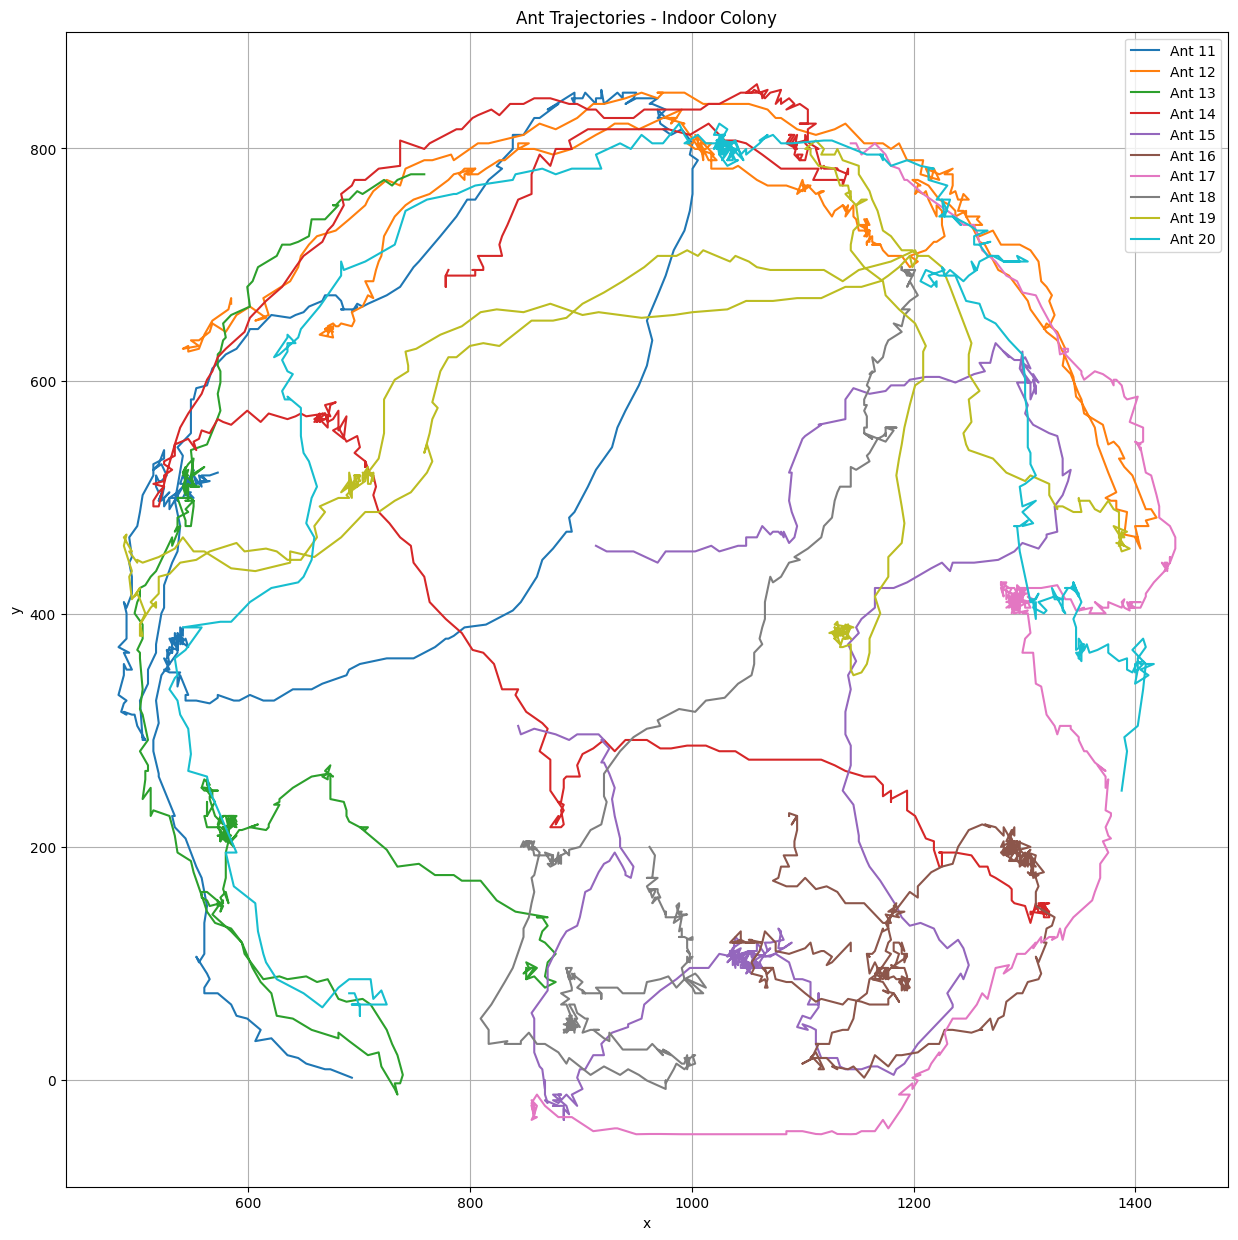

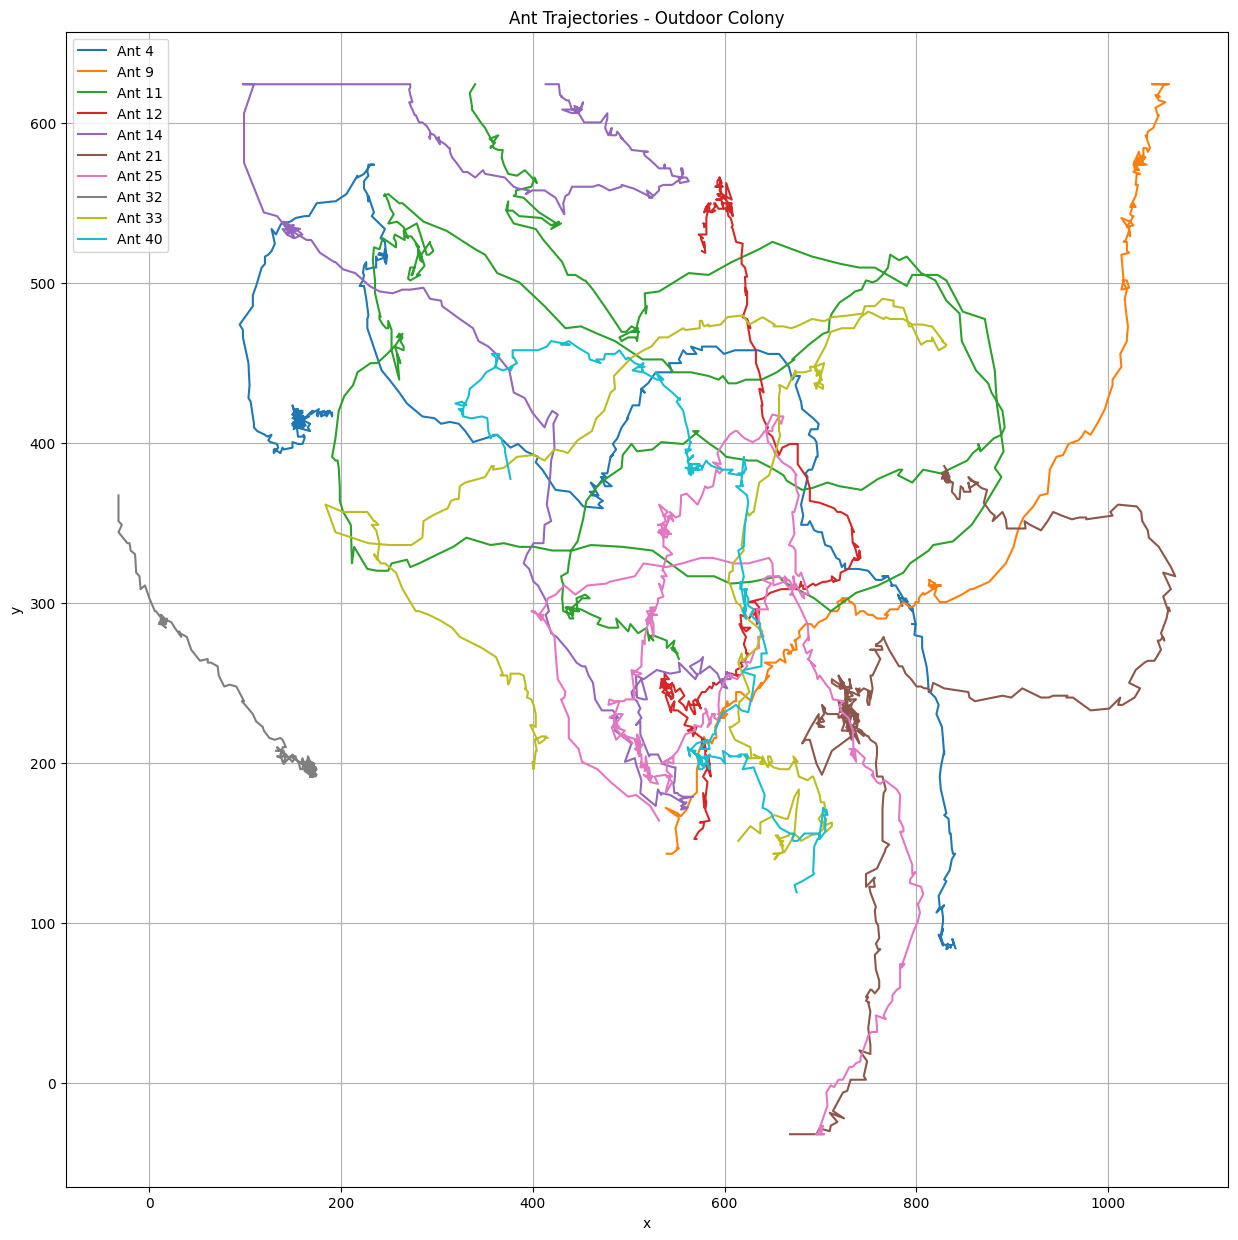

In [ ]:
indoor = preprocess_antcolony_data(ant_data['file'][0])
outdoor = preprocess_antcolony_data(ant_data['file'][5])

plt.figure(figsize=(15,15))
for ant_id, ant_d in indoor.groupby('ant_id'):
    plt.plot(ant_d['x'], ant_d['y'], label=f'Ant {ant_id}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ant Trajectories - Indoor Colony')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15,15))
for ant_id, ant_d in outdoor.groupby('ant_id'):
    plt.plot(ant_d['x'], ant_d['y'], label=f'Ant {ant_id}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ant Trajectories - Outdoor Colony')
plt.legend()
plt.grid(True)
plt.show()   

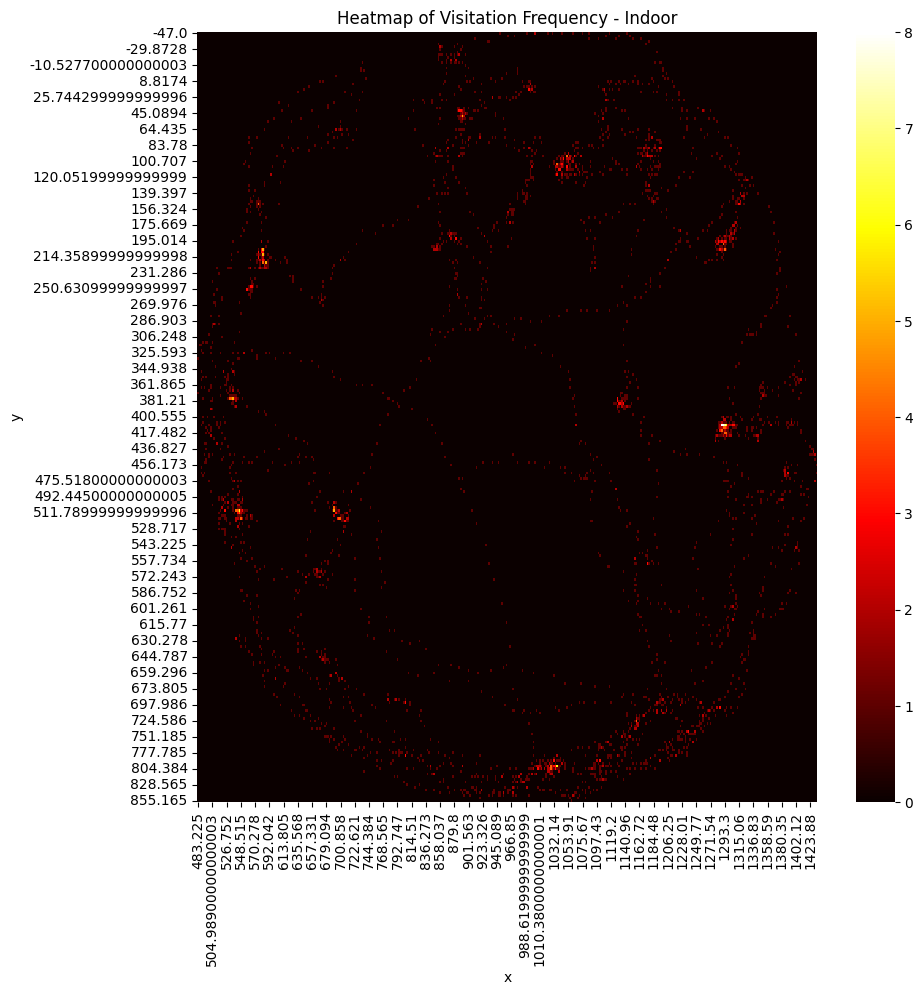

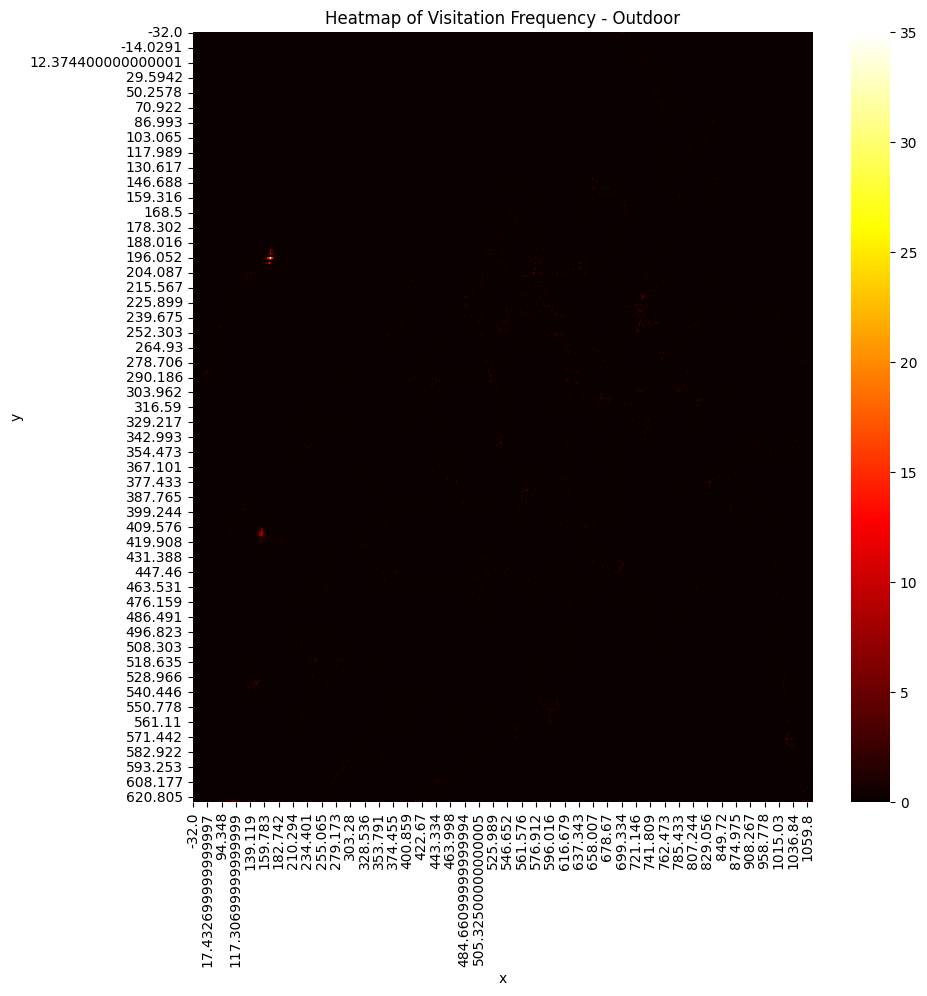

In [24]:
import seaborn as sns

# Create heatmap of visitation frequency
heatmap_in = indoor.groupby(['x', 'y']).size().reset_index(name='count')
heatmap_in = heatmap_in.pivot(index='y', columns='x', values='count').fillna(0)

heatmap_out = outdoor.groupby(['x', 'y']).size().reset_index(name='count')
heatmap_out = heatmap_out.pivot(index='y', columns='x', values='count').fillna(0)

plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_in, cmap='hot')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heatmap of Visitation Frequency - Indoor')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_out, cmap='hot')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heatmap of Visitation Frequency - Outdoor')
plt.show()